In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"
%matplotlib widget

In [2]:
import addict
import pickle
import scipy.io as sio
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.cm as cm

from matplotlib.colors import Normalize
from importlib import reload

import celeri

plt.rcParams["text.usetex"] = False

In [3]:
pickle_file = open("./../runs/0000000006/0000000006.pkl", "rb")
data = pickle.load(pickle_file)
command = data[0]
estimation = data[1]
station = data[2]
segment = data[3]
block = data[4]
meshes = data[5]

# Plot model summary


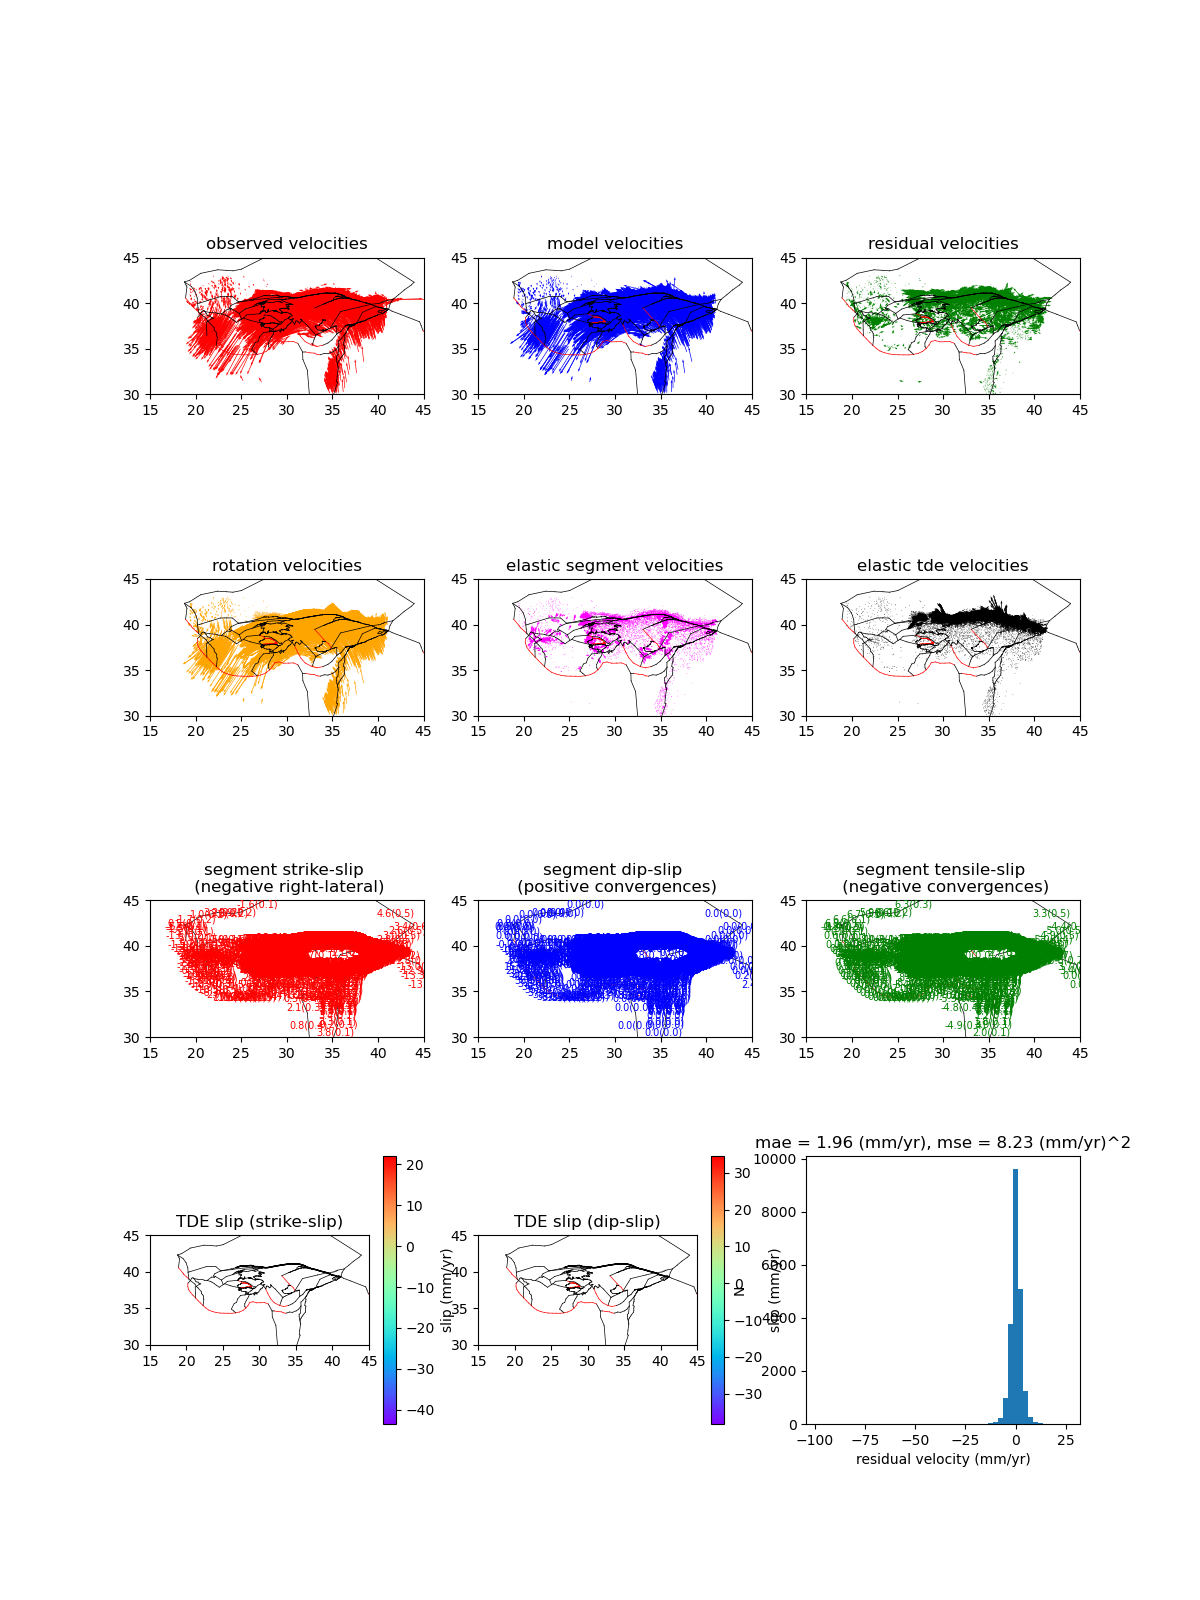

2024-07-10 18:50:28.615 | SUCCESS  | celeri.celeri:plot_estimation_summary:5457 - Wrote figures../runs/0000000006/plot_estimation_summary.(pdf, png)


In [4]:
celeri.plot_estimation_summary(
    command,
    segment,
    station,
    meshes,
    estimation,
    lon_range=command.lon_range,
    lat_range=command.lat_range,
    quiver_scale=command.quiver_scale,
)

In [5]:
# TODO: Big dictionary for plotting params
# TODO: celeri function to return default plotting params dictionary
# TODO: Update use of plotting paramers to include dictionary notation
# TODO: Wrapper function to put all plotting together (JPL request)
# TODO: Tune for Western North America so we can remove Anatolia files

In [6]:
p = addict.Dict()
p.WORLD_BOUNDARIES = sio.loadmat("WorldHiVectors.mat")
p.FIGSIZE_VECTORS = (10, 4)
p.FONTSIZE = 16
p.LON_RANGE = (25, 42)
p.LAT_RANGE = (34, 43)
p.LON_TICKS = [25, 27, 29, 31, 33, 35, 37, 39, 41]
p.LAT_TICKS = [34, 36, 38, 40, 42]
p.SLIP_RATE_MIN = -25.0
p.SLIP_RATE_MAX = 25.0
p.LAND_COLOR = "lightgray"
p.LAND_LINEWIDTH = 0.5
p.LAND_ZORDER = 0
p.KEY_RECTANGLE_ANCHOR = [39, 34]
p.KEY_RECTANGLE_WIDTH = 3.0
p.KEY_RECTANGLE_HEIGHT = 1.55
p.KEY_ARROW_LON = 40.5
p.KEY_ARROW_LAT = 34.5
p.KEY_ARROW_MAGNITUDE = 25.0
p.KEY_ARROW_TEXT = "25 mm/yr"
p.KEY_ARROW_COLOR = "k"
p.KEY_BACKGROUND_COLOR = "white"
p.KEY_LINEWIDTH = 1.0
p.KEY_EDGECOLOR = "k"
p.ARROW_MAGNITUDE_MIN = 0.0
p.ARROW_MAGNITUDE_MAX = 25.0
p.ARROW_COLORMAP = cm.plasma
p.ARROW_SCALE = 100
p.ARROW_WIDTH = 0.0025
p.ARROW_LINEWIDTH = 0.5
p.ARROW_EDGECOLOR = "k"
p.SEGMENT_LINE_WIDTH_OUTER = 2.0
p.SEGMENT_LINE_WIDTH_INNER = 1.0
p.SEGMENT_LINE_COLOR_OUTER = "k"
p.SEGMENT_LINE_COLOR_INNER = "w"

In [7]:
def common_plot_elements(segment, lon_range, lat_range):
    """Elements common to all subplots
    Args:
        segment (pd.DataFrame): Fault segments
        lon_range (Tuple): Longitude range (min, max)
        lat_range (Tuple): Latitude range (min, max)
    """
    for i in range(len(segment)):
        plt.plot(
            [segment.lon1[i], segment.lon2[i]],
            [segment.lat1[i], segment.lat2[i]],
            "-k",
            linewidth=p.SEGMENT_LINE_WIDTH_OUTER,
        )
    for i in range(len(segment)):
        plt.plot(
            [segment.lon1[i], segment.lon2[i]],
            [segment.lat1[i], segment.lat2[i]],
            "-w",
            linewidth=p.SEGMENT_LINE_WIDTH_INNER,
        )

    plt.xlim([lon_range[0], lon_range[1]])
    plt.ylim([lat_range[0], lat_range[1]])
    plt.xticks(p.LON_TICKS)
    plt.yticks(p.LAT_TICKS)
    plt.gca().set_aspect("equal", adjustable="box")
    plt.xlabel("longitude (degrees)", fontsize=p.FONTSIZE)
    plt.ylabel("latitude (degrees)", fontsize=p.FONTSIZE)
    plt.tick_params(labelsize=p.FONTSIZE)


def plot_vel_arrows_elements(east_velocity, north_velocity, arrow_scale):
    # Draw velocity vectors
    velocity_magnitude = np.sqrt(east_velocity**2.0 + north_velocity**2.0)
    norm = Normalize()
    norm.autoscale(velocity_magnitude)
    norm.vmin = p.ARROW_MAGNITUDE_MIN
    norm.vmax = p.ARROW_MAGNITUDE_MAX
    colormap = p.ARROW_COLORMAP
    quiver_handle = plt.quiver(
        station.lon,
        station.lat,
        east_velocity,
        north_velocity,
        scale=p.ARROW_SCALE * arrow_scale,
        width=p.ARROW_WIDTH,
        scale_units="inches",
        color=colormap(norm(velocity_magnitude)),
        linewidth=p.ARROW_LINEWIDTH,
        edgecolor=p.ARROW_EDGECOLOR,
    )

    # Draw land
    plt.fill(
        p.WORLD_BOUNDARIES["lon"],
        p.WORLD_BOUNDARIES["lat"],
        color=p.LAND_COLOR,
        linewidth=p.LAND_LINEWIDTH,
        zorder=p.LAND_ZORDER,
    )

    # Draw white background rectangle
    rect = mpatches.Rectangle(
        p.KEY_RECTANGLE_ANCHOR,
        p.KEY_RECTANGLE_WIDTH,
        p.KEY_RECTANGLE_HEIGHT,
        fill=True,
        color=p.KEY_BACKGROUND_COLOR,
        linewidth=p.KEY_LINEWIDTH,
        ec=p.KEY_EDGECOLOR,
    )
    plt.gca().add_patch(rect)

    # Draw arrow legend
    plt.quiverkey(
        quiver_handle,
        p.KEY_ARROW_LON,
        p.KEY_ARROW_LAT,
        p.KEY_ARROW_MAGNITUDE,
        p.KEY_ARROW_TEXT,
        coordinates="data",
        color=p.KEY_ARROW_COLOR,
        fontproperties={"size": p.FONTSIZE},
    )

    plt.gca().set_aspect("equal")
    plt.show()

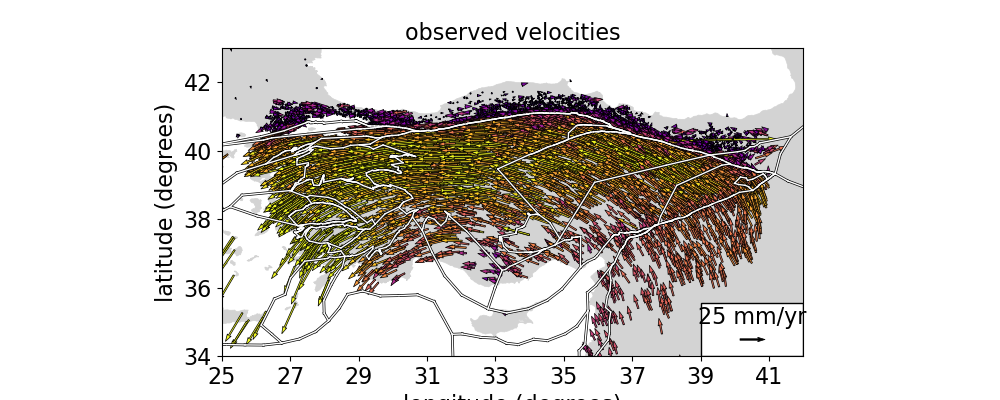

In [8]:
# Observed velocities
plt.figure(figsize=p.FIGSIZE_VECTORS)
plt.title("observed velocities", fontsize=p.FONTSIZE)
common_plot_elements(segment, p.LON_RANGE, p.LAT_RANGE)
plot_vel_arrows_elements(station.east_vel, station.north_vel, arrow_scale=1.0)

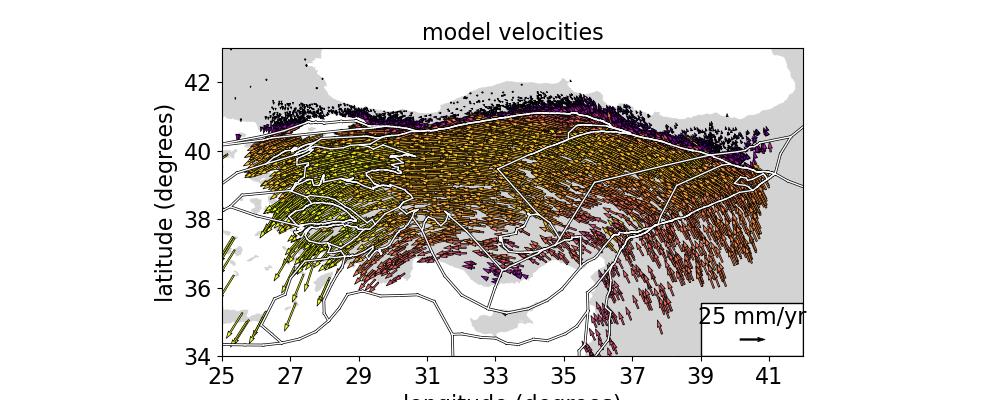

In [9]:
# Model velocities
plt.figure(figsize=p.FIGSIZE_VECTORS)
plt.title("model velocities", fontsize=p.FONTSIZE)
common_plot_elements(segment, p.LON_RANGE, p.LAT_RANGE)
plot_vel_arrows_elements(estimation.east_vel, estimation.north_vel, arrow_scale=1.0)

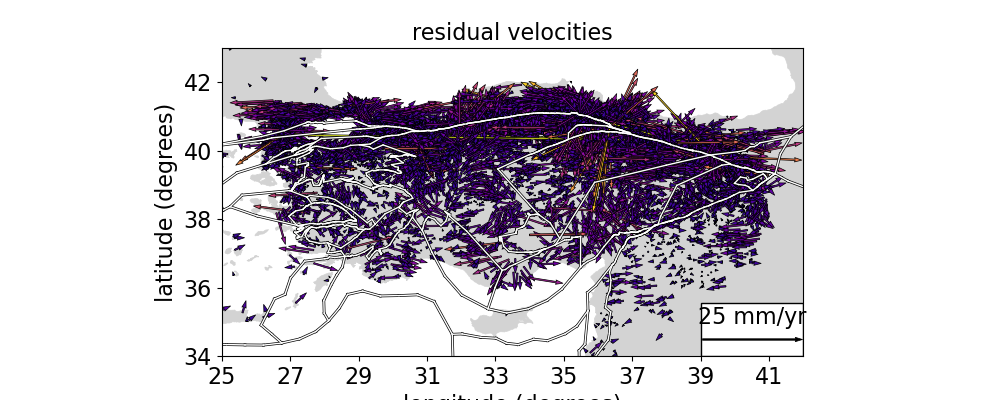

In [10]:
# Residual velocities
plt.figure(figsize=p.FIGSIZE_VECTORS)
plt.title("residual velocities", fontsize=p.FONTSIZE)
common_plot_elements(segment, p.LON_RANGE, p.LAT_RANGE)
plot_vel_arrows_elements(
    estimation.east_vel_residual, estimation.north_vel_residual, arrow_scale=0.25
)

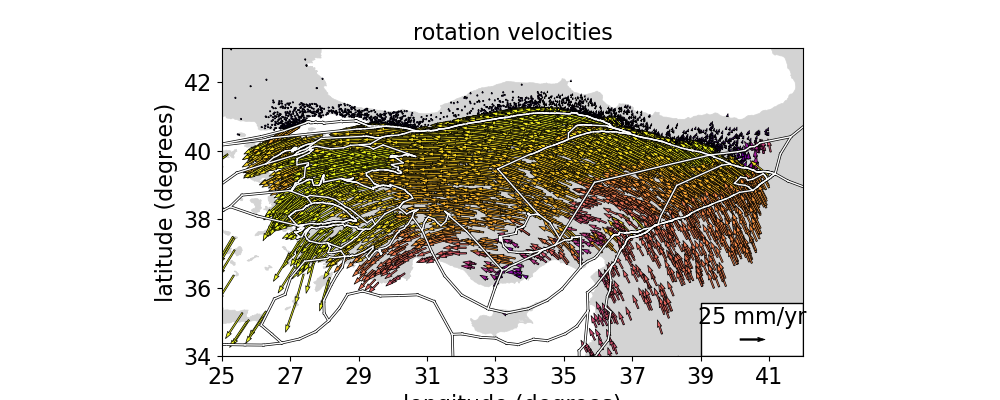

In [11]:
# Rotation velocities
plt.figure(figsize=p.FIGSIZE_VECTORS)
plt.title("rotation velocities", fontsize=p.FONTSIZE)
common_plot_elements(segment, p.LON_RANGE, p.LAT_RANGE)
plot_vel_arrows_elements(
    estimation.east_vel_rotation, estimation.north_vel_rotation, arrow_scale=1.0
)

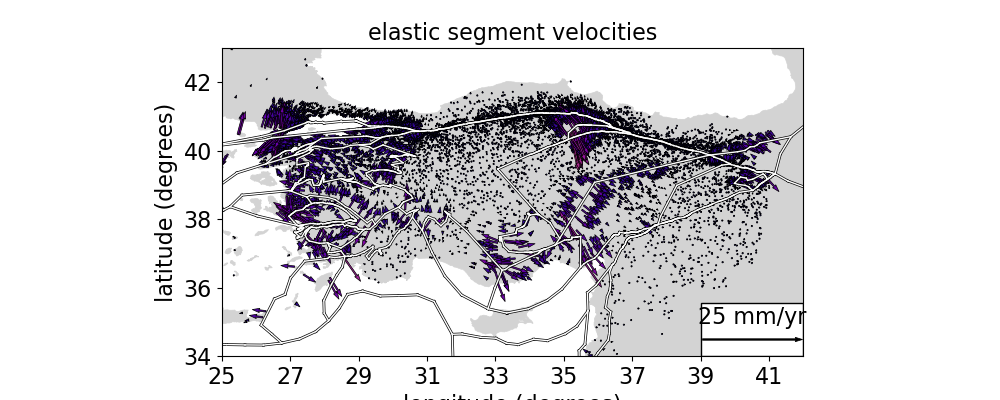

In [14]:
# Elastic segment velocities
plt.figure(figsize=p.FIGSIZE_VECTORS)
plt.title("elastic segment velocities", fontsize=p.FONTSIZE)
common_plot_elements(segment, p.LON_RANGE, p.LAT_RANGE)
plot_vel_arrows_elements(
    estimation.east_vel_elastic_segment,
    estimation.north_vel_elastic_segment,
    arrow_scale=0.25,
)

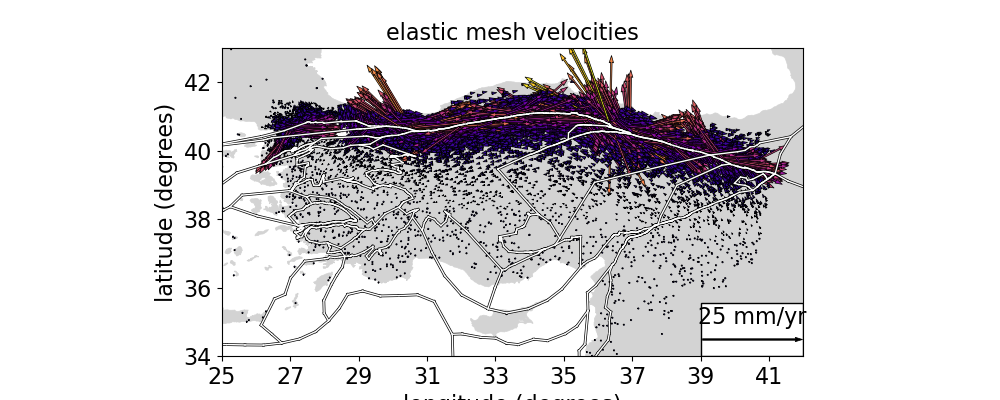

In [15]:
# Elastic tde velocities
plt.figure(figsize=p.FIGSIZE_VECTORS)
plt.title("elastic mesh velocities", fontsize=p.FONTSIZE)
common_plot_elements(segment, p.LON_RANGE, p.LAT_RANGE)
plot_vel_arrows_elements(
    estimation.east_vel_tde, estimation.north_vel_tde, arrow_scale=0.25
)

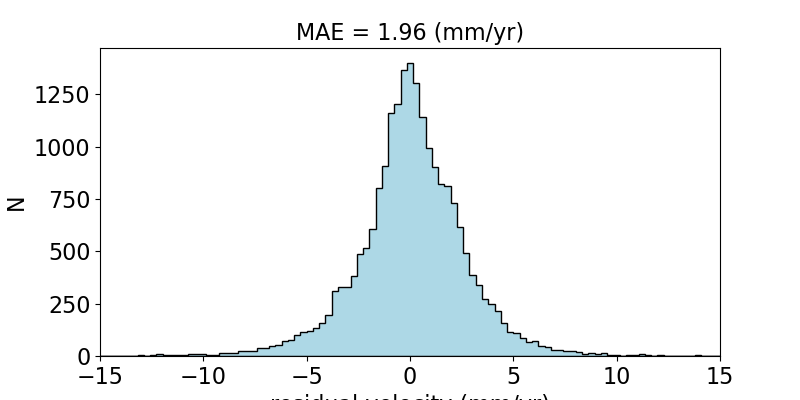

In [17]:
# Residual velocities
residual_velocity_vector = np.concatenate(
    (estimation.east_vel_residual.values, estimation.north_vel_residual.values)
)
mean_average_error = np.mean(np.abs(residual_velocity_vector))

N_BINS = 100
BIN_EDGE_MIN = -15
BIN_EDGE_MAX = 15
BINS = np.linspace(BIN_EDGE_MIN, BIN_EDGE_MAX, N_BINS)

# Create histogram of residual velocities
plt.figure(figsize=(8, 4))
plt.hist(
    residual_velocity_vector,
    BINS,
    histtype="stepfilled",
    color="lightblue",
    edgecolor="k",
)
plt.xlim([BIN_EDGE_MIN, BIN_EDGE_MAX])
plt.xlabel("residual velocity (mm/yr)", fontsize=p.FONTSIZE)
plt.ylabel("N", fontsize=p.FONTSIZE)
plt.title(f"MAE = {mean_average_error:.2f} (mm/yr)", fontsize=p.FONTSIZE)
plt.tick_params(labelsize=p.FONTSIZE)
plt.show()

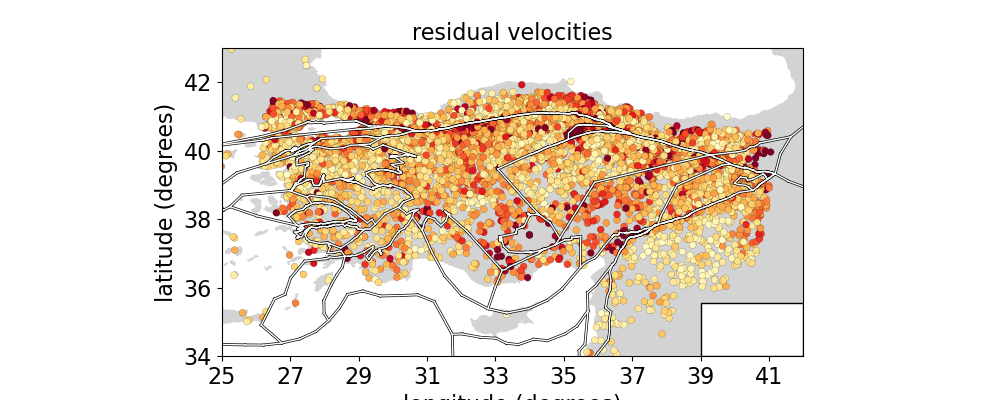

In [18]:
# Scatter plot for velocity estimate errors
mae_station = np.abs(estimation.east_vel_residual.values) + np.abs(
    estimation.north_vel_residual.values
)
fig = plt.figure(figsize=p.FIGSIZE_VECTORS)
plt.title("residual velocities", fontsize=16)
plt.fill(
    p.WORLD_BOUNDARIES["lon"],
    p.WORLD_BOUNDARIES["lat"],
    color=p.LAND_COLOR,
    linewidth=p.LAND_LINEWIDTH,
    zorder=p.LAND_ZORDER,
)

plt.scatter(
    station.lon,
    station.lat,
    s=25,
    edgecolors="k",
    c=mae_station,
    cmap="YlOrRd",
    linewidths=0.1,
)
common_plot_elements(segment, p.LON_RANGE, p.LAT_RANGE)

# cbar = plt.colorbar(label="absolute error", shrink=0.45)
plt.clim(0, 10)

# Draw white background rectangle
rect = mpatches.Rectangle(
    p.KEY_RECTANGLE_ANCHOR,
    p.KEY_RECTANGLE_WIDTH,
    p.KEY_RECTANGLE_HEIGHT,
    fill=True,
    color=p.KEY_BACKGROUND_COLOR,
    linewidth=p.KEY_LINEWIDTH,
    ec=p.KEY_EDGECOLOR,
)
plt.gca().add_patch(rect)
plt.show()

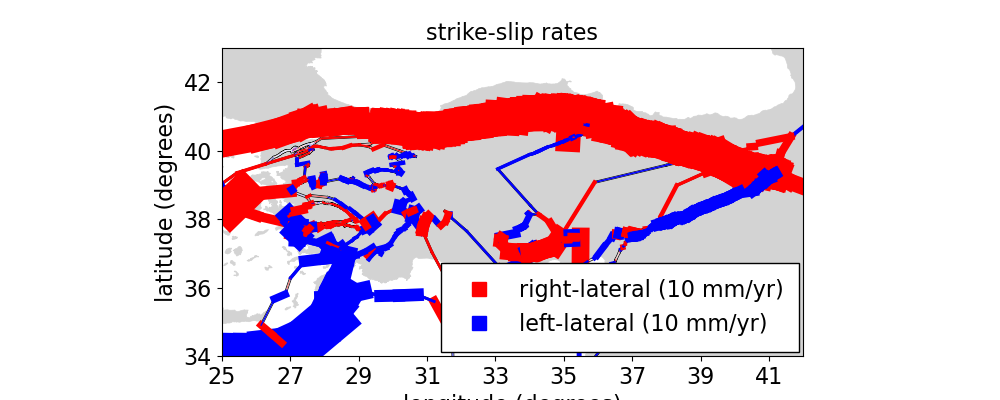

In [19]:
# Plot estimated strike-slip rates
plt.figure(figsize=p.FIGSIZE_VECTORS)
plt.title("strike-slip rates", fontsize=p.FONTSIZE)
common_plot_elements(segment, p.LON_RANGE, p.LAT_RANGE)

plt.fill(
    p.WORLD_BOUNDARIES["lon"],
    p.WORLD_BOUNDARIES["lat"],
    color=p.LAND_COLOR,
    linewidth=p.LAND_LINEWIDTH,
    zorder=p.LAND_ZORDER,
)

for i in range(len(segment)):
    if estimation.strike_slip_rates[i] < 0:
        plt.plot(
            [segment.lon1[i], segment.lon2[i]],
            [segment.lat1[i], segment.lat2[i]],
            "-r",
            linewidth=estimation.strike_slip_rates[i],
        )
    else:
        plt.plot(
            [segment.lon1[i], segment.lon2[i]],
            [segment.lat1[i], segment.lat2[i]],
            "-b",
            linewidth=estimation.strike_slip_rates[i],
        )

# Legend
black_segments = mlines.Line2D(
    [],
    [],
    color="red",
    marker="s",
    linestyle="None",
    markersize=10,
    label="right-lateral (10 mm/yr)",
)
red_segments = mlines.Line2D(
    [],
    [],
    color="blue",
    marker="s",
    linestyle="None",
    markersize=10,
    label="left-lateral (10 mm/yr)",
)
plt.legend(
    handles=[black_segments, red_segments],
    loc="lower right",
    fontsize=p.FONTSIZE,
    framealpha=1.0,
    edgecolor="k",
).get_frame().set_boxstyle("Square")

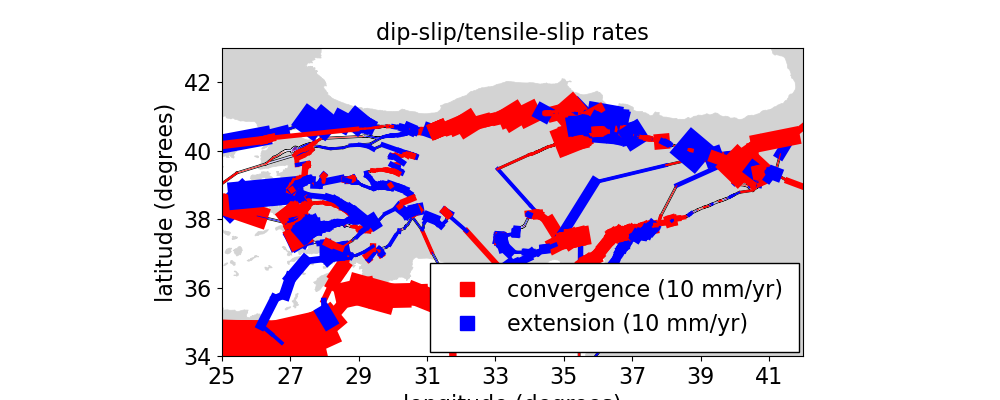

In [20]:
# Plot estimated strike-slip rates
plt.figure(figsize=p.FIGSIZE_VECTORS)
plt.title("dip-slip/tensile-slip rates", fontsize=p.FONTSIZE)
common_plot_elements(segment, p.LON_RANGE, p.LAT_RANGE)

plt.fill(
    p.WORLD_BOUNDARIES["lon"],
    p.WORLD_BOUNDARIES["lat"],
    color=p.LAND_COLOR,
    linewidth=p.LAND_LINEWIDTH,
    zorder=p.LAND_ZORDER,
)

for i in range(len(segment)):
    if estimation.dip_slip_rates[i] > 0:
        plt.plot(
            [segment.lon1[i], segment.lon2[i]],
            [segment.lat1[i], segment.lat2[i]],
            "-r",
            linewidth=estimation.dip_slip_rates[i],
        )
    else:
        plt.plot(
            [segment.lon1[i], segment.lon2[i]],
            [segment.lat1[i], segment.lat2[i]],
            "-b",
            linewidth=estimation.dip_slip_rates[i],
        )

for i in range(len(segment)):
    if estimation.tensile_slip_rates[i] < 0:
        plt.plot(
            [segment.lon1[i], segment.lon2[i]],
            [segment.lat1[i], segment.lat2[i]],
            "-r",
            linewidth=estimation.tensile_slip_rates[i],
        )
    else:
        plt.plot(
            [segment.lon1[i], segment.lon2[i]],
            [segment.lat1[i], segment.lat2[i]],
            "-b",
            linewidth=estimation.tensile_slip_rates[i],
        )


# Legend
black_segments = mlines.Line2D(
    [],
    [],
    color="red",
    marker="s",
    linestyle="None",
    markersize=10,
    label="convergence (10 mm/yr)",
)
red_segments = mlines.Line2D(
    [],
    [],
    color="blue",
    marker="s",
    linestyle="None",
    markersize=10,
    label="extension (10 mm/yr)",
)
plt.legend(
    handles=[black_segments, red_segments],
    loc="lower right",
    fontsize=p.FONTSIZE,
    framealpha=1.0,
    edgecolor="k",
).get_frame().set_boxstyle("Square")